In [46]:
# Using the MNIS dataset
from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report
import numpy as np

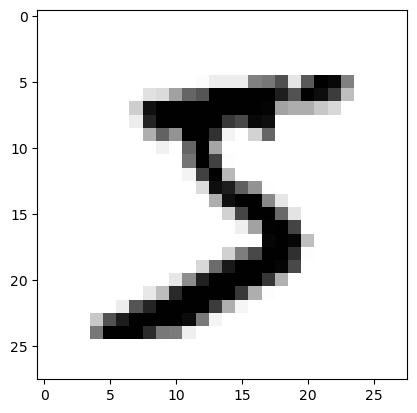

In [45]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train.shape (60000, 28, 28) -> 60000 images with 28x28 pixels
single_image = x_train[0]
plt.imshow(single_image, cmap="gray_r")

In [44]:
# Labels
# Yet not one-hot encoded
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [43]:
# Since this is a classification problem we need to create classes, instead of the categories as numbers -> which could cause a optimization approach in the network

In [47]:
# one-hot encoding
# the index now tells what the numbers is. A 1 at index 3 means -> The number is a 2 (counting from 0)
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [48]:
x_train = x_train / x_train.max() # Devide by 255
x_test = x_test / x_test.max()

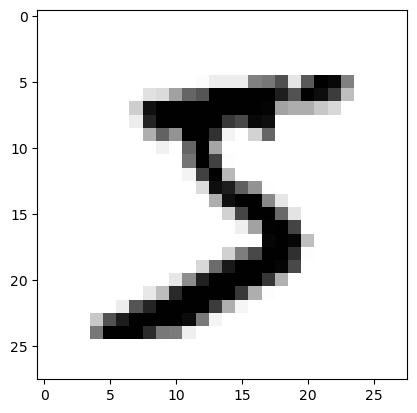

In [50]:
scaled_image = x_train[0] # all data is now between 0 and 1, ratio is kept, so the image stays the same
plt.imshow(scaled_image, cmap="gray_r")

In [51]:
x_train.shape

(60000, 28, 28, 1)

In [49]:
# make it generic for images with more color channels by considering the channels as well -> reshape
x_train = x_train.reshape(60000, 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [52]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

In [54]:
# Build and train the model
model = Sequential() # create the model

# CONVOLUTIONAL LAYER
model.add(Convolution2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation="relu"))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# Transform conv and pooling layer into something a dense layer can understand -> flatten out the layers -> flat out 2d stuff to 1d
model.add(Flatten())

# DENSE LAYER
model.add(Dense(128, activation="relu"))

model.add(Dense(10,activation="softmax"))  # softmax directly outputs what the classes are

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

/home/peter/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,183,574 (4.51 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 591,788 (2.26 MB)

In [55]:
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9141 - loss: 0.2804
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9854 - loss: 0.0484


In [56]:
model.metrics_names

['loss', 'compile_metrics']

In [58]:
model.evaluate(x_test, y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9814 - loss: 0.0542


[0.04342014342546463, 0.9846000075340271]

In [64]:
predictions = np.argmax(model.predict(x_test), axis=-1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [61]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [66]:
print(classification_report(y_test, predictions))
# Evaluation : About 98 % accuracy, that's great!

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.97      0.99      0.98       892
           6       1.00      0.97      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

